In [1]:
from acquire import get_telco_data
from prepare import clean_data

import pandas as pd
import numpy as np
from scipy import stats
import math

import matplotlib.pyplot as plt
import seaborn as sns

# preparing

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.metrics import confusion_matrix, classification_report, recall_score, f1_score, precision_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier


# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# <center>Acquire Data<center>

In [2]:
# Use the imported function from acquire.py to panda data frame
df = get_telco_data()
# View the first 5 recored of data frame a look at our dataframe
df.head(5).T

,0,1,2,3,4
payment_type_id,2,4,3,4,3
internet_service_type_id,1,1,1,1,1
contract_type_id,3,3,3,3,3
customer_id,0016-QLJIS,0017-DINOC,0019-GFNTW,0056-EPFBG,0078-XZMHT
gender,Female,Male,Female,Male,Male
senior_citizen,0,0,0,0,0
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,Yes,No
tenure,65,54,56,20,72
phone_service,Yes,No,No,No,Yes


# Prepare Data

In [3]:
df.head().T

,0,1,2,3,4
payment_type_id,2,4,3,4,3
internet_service_type_id,1,1,1,1,1
contract_type_id,3,3,3,3,3
customer_id,0016-QLJIS,0017-DINOC,0019-GFNTW,0056-EPFBG,0078-XZMHT
gender,Female,Male,Female,Male,Male
senior_citizen,0,0,0,0,0
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,Yes,No
tenure,65,54,56,20,72
phone_service,Yes,No,No,No,Yes


In [4]:
df = clean_data()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   payment_type_id                    7032 non-null   int64  
 1   internet_service_type_id           7032 non-null   int64  
 2   contract_type_id                   7032 non-null   int64  
 3   senior_citizen                     7032 non-null   int64  
 4   partner                            7032 non-null   int64  
 5   dependents                         7032 non-null   int64  
 6   tenure                             7032 non-null   int64  
 7   phone_service                      7032 non-null   int64  
 8   multiple_lines                     7032 non-null   object 
 9   online_security                    7032 non-null   object 
 10  online_backup                      7032 non-null   object 
 11  device_protection                  7032 non-null   objec

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
newdf

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,is_female
0,2,1,3,0,1,1,65,1,1,90.45,5957.90,0,1
1,4,1,3,0,0,0,54,0,0,45.20,2460.55,0,0
2,3,1,3,0,0,0,56,0,0,45.05,2560.10,0,1
3,4,1,3,0,1,1,20,0,1,39.40,825.40,0,0
4,3,1,3,0,1,0,72,1,1,85.15,6316.20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,3,1,0,1,1,1,1,0,20.05,20.05,0,1
7039,2,3,1,0,0,0,19,1,0,19.90,367.55,0,1
7040,4,3,1,0,0,0,6,1,0,19.70,129.55,0,1
7041,2,3,1,0,0,0,1,1,0,18.90,18.90,0,0


## Train, Validate, Test Split


In [7]:
# Creates a fucntion that train_validate_test_split the data before using it
# in the exploratory phase
def train_validate_test_split(x):
    """
    This function returns three datasets labeld as train, validate, test
    Data is divided as follows:
    - train    = 50%
    - validate = 30%
    - test     = 20%
    """
    train_validate, test = train_test_split(x, test_size=.2, 
                                            random_state=123, 
                                            stratify=x.churn)
    
    # Split train_validate into train and validate datasets.
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.churn)
    return train, validate, test

In [8]:
train, validate, test = train_validate_test_split(df)

In [9]:
print(train.shape)
print(validate.shape)
print(test.shape)

(3937, 38)
(1688, 38)
(1407, 38)


# <center>Exploratory<center>

In [10]:
churn_rate = train.churn.value_counts(normalize=True)[1]
churn_rate

0.2656845313690627

In [11]:
train['internet_service_type_None']

6096    1
1603    0
5350    0
2068    0
6366    1
       ..
296     0
4200    0
3012    0
763     0
3935    0
Name: internet_service_type_None, Length: 3937, dtype: uint8

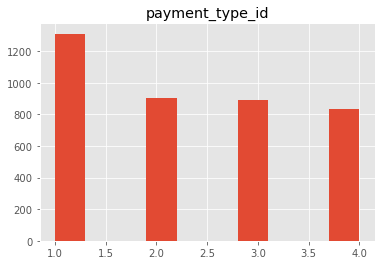

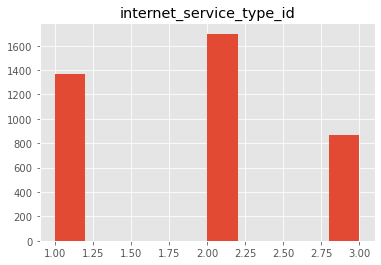

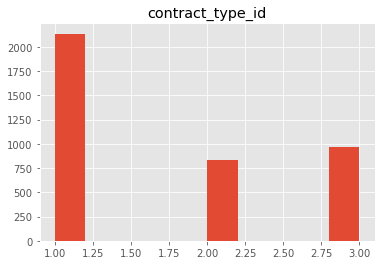

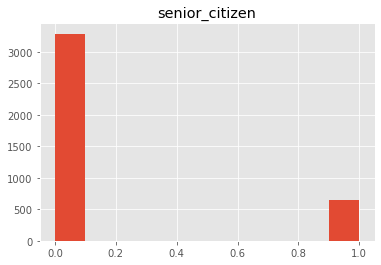

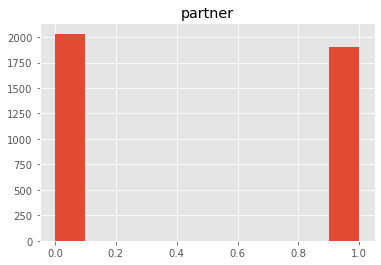

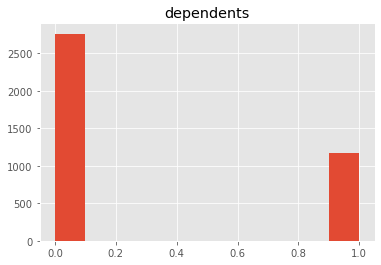

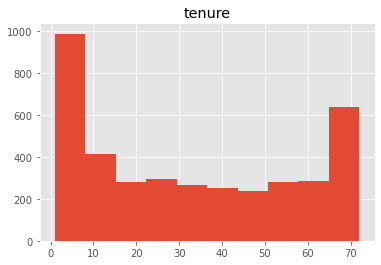

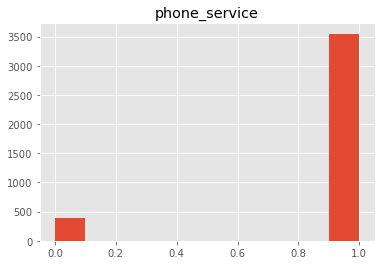

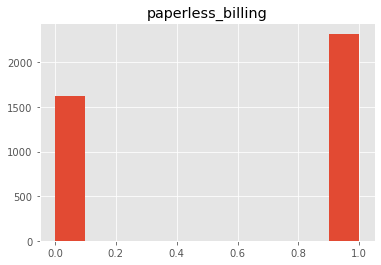

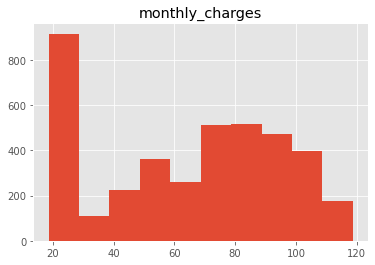

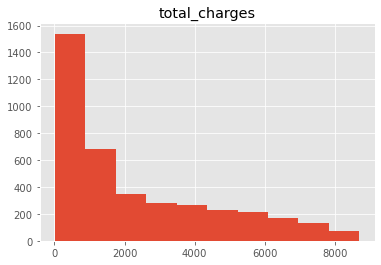

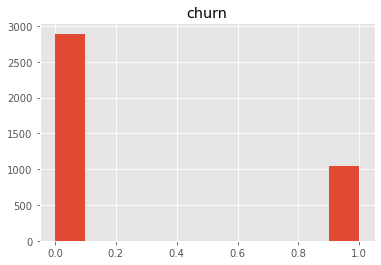

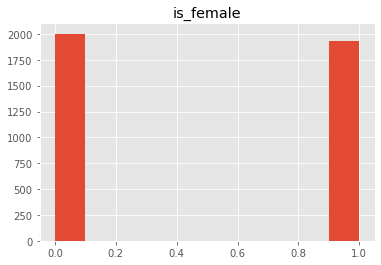

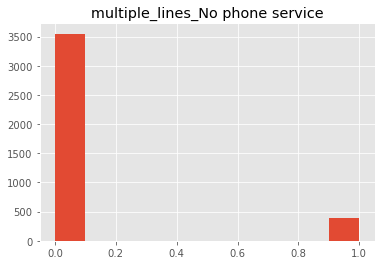

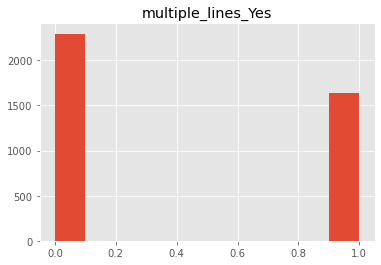

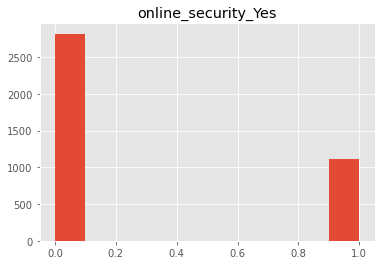

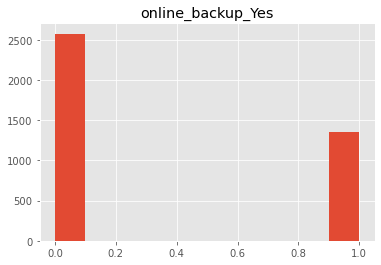

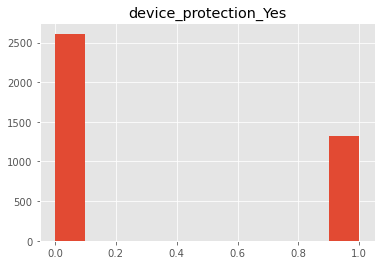

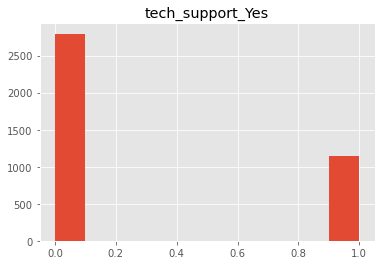

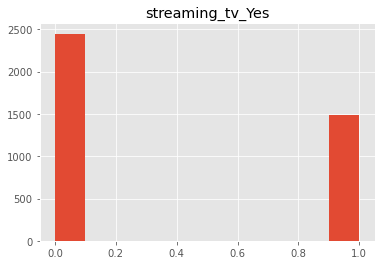

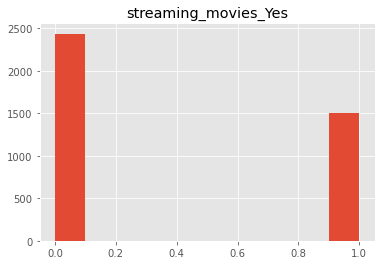

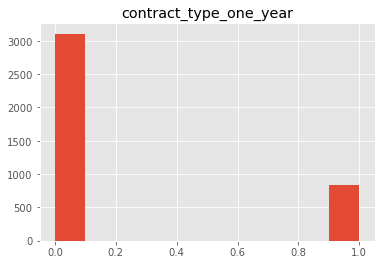

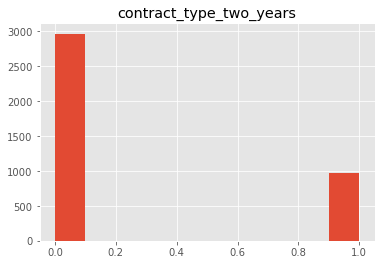

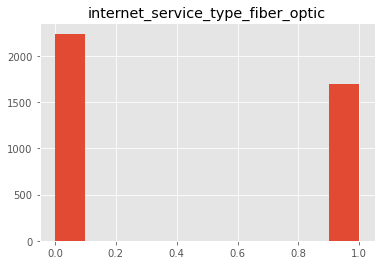

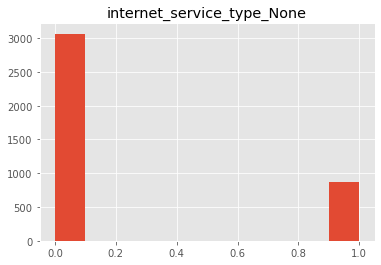

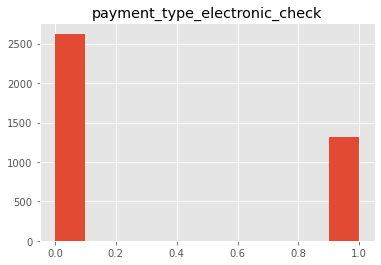

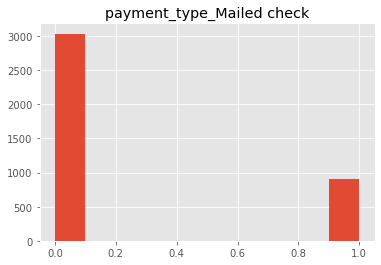

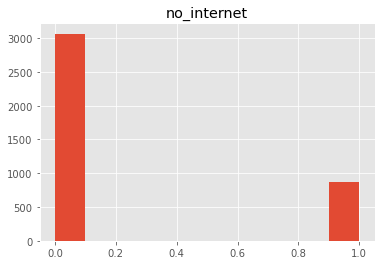

In [12]:
# Plot numeric columns
num_cols = train.columns[[train[col].dtype != 'object' for col in train.columns]]
for col in num_cols:
    plt.style.use('ggplot')
    plt.hist(train[col])
    plt.title(col)
    plt.show()
   

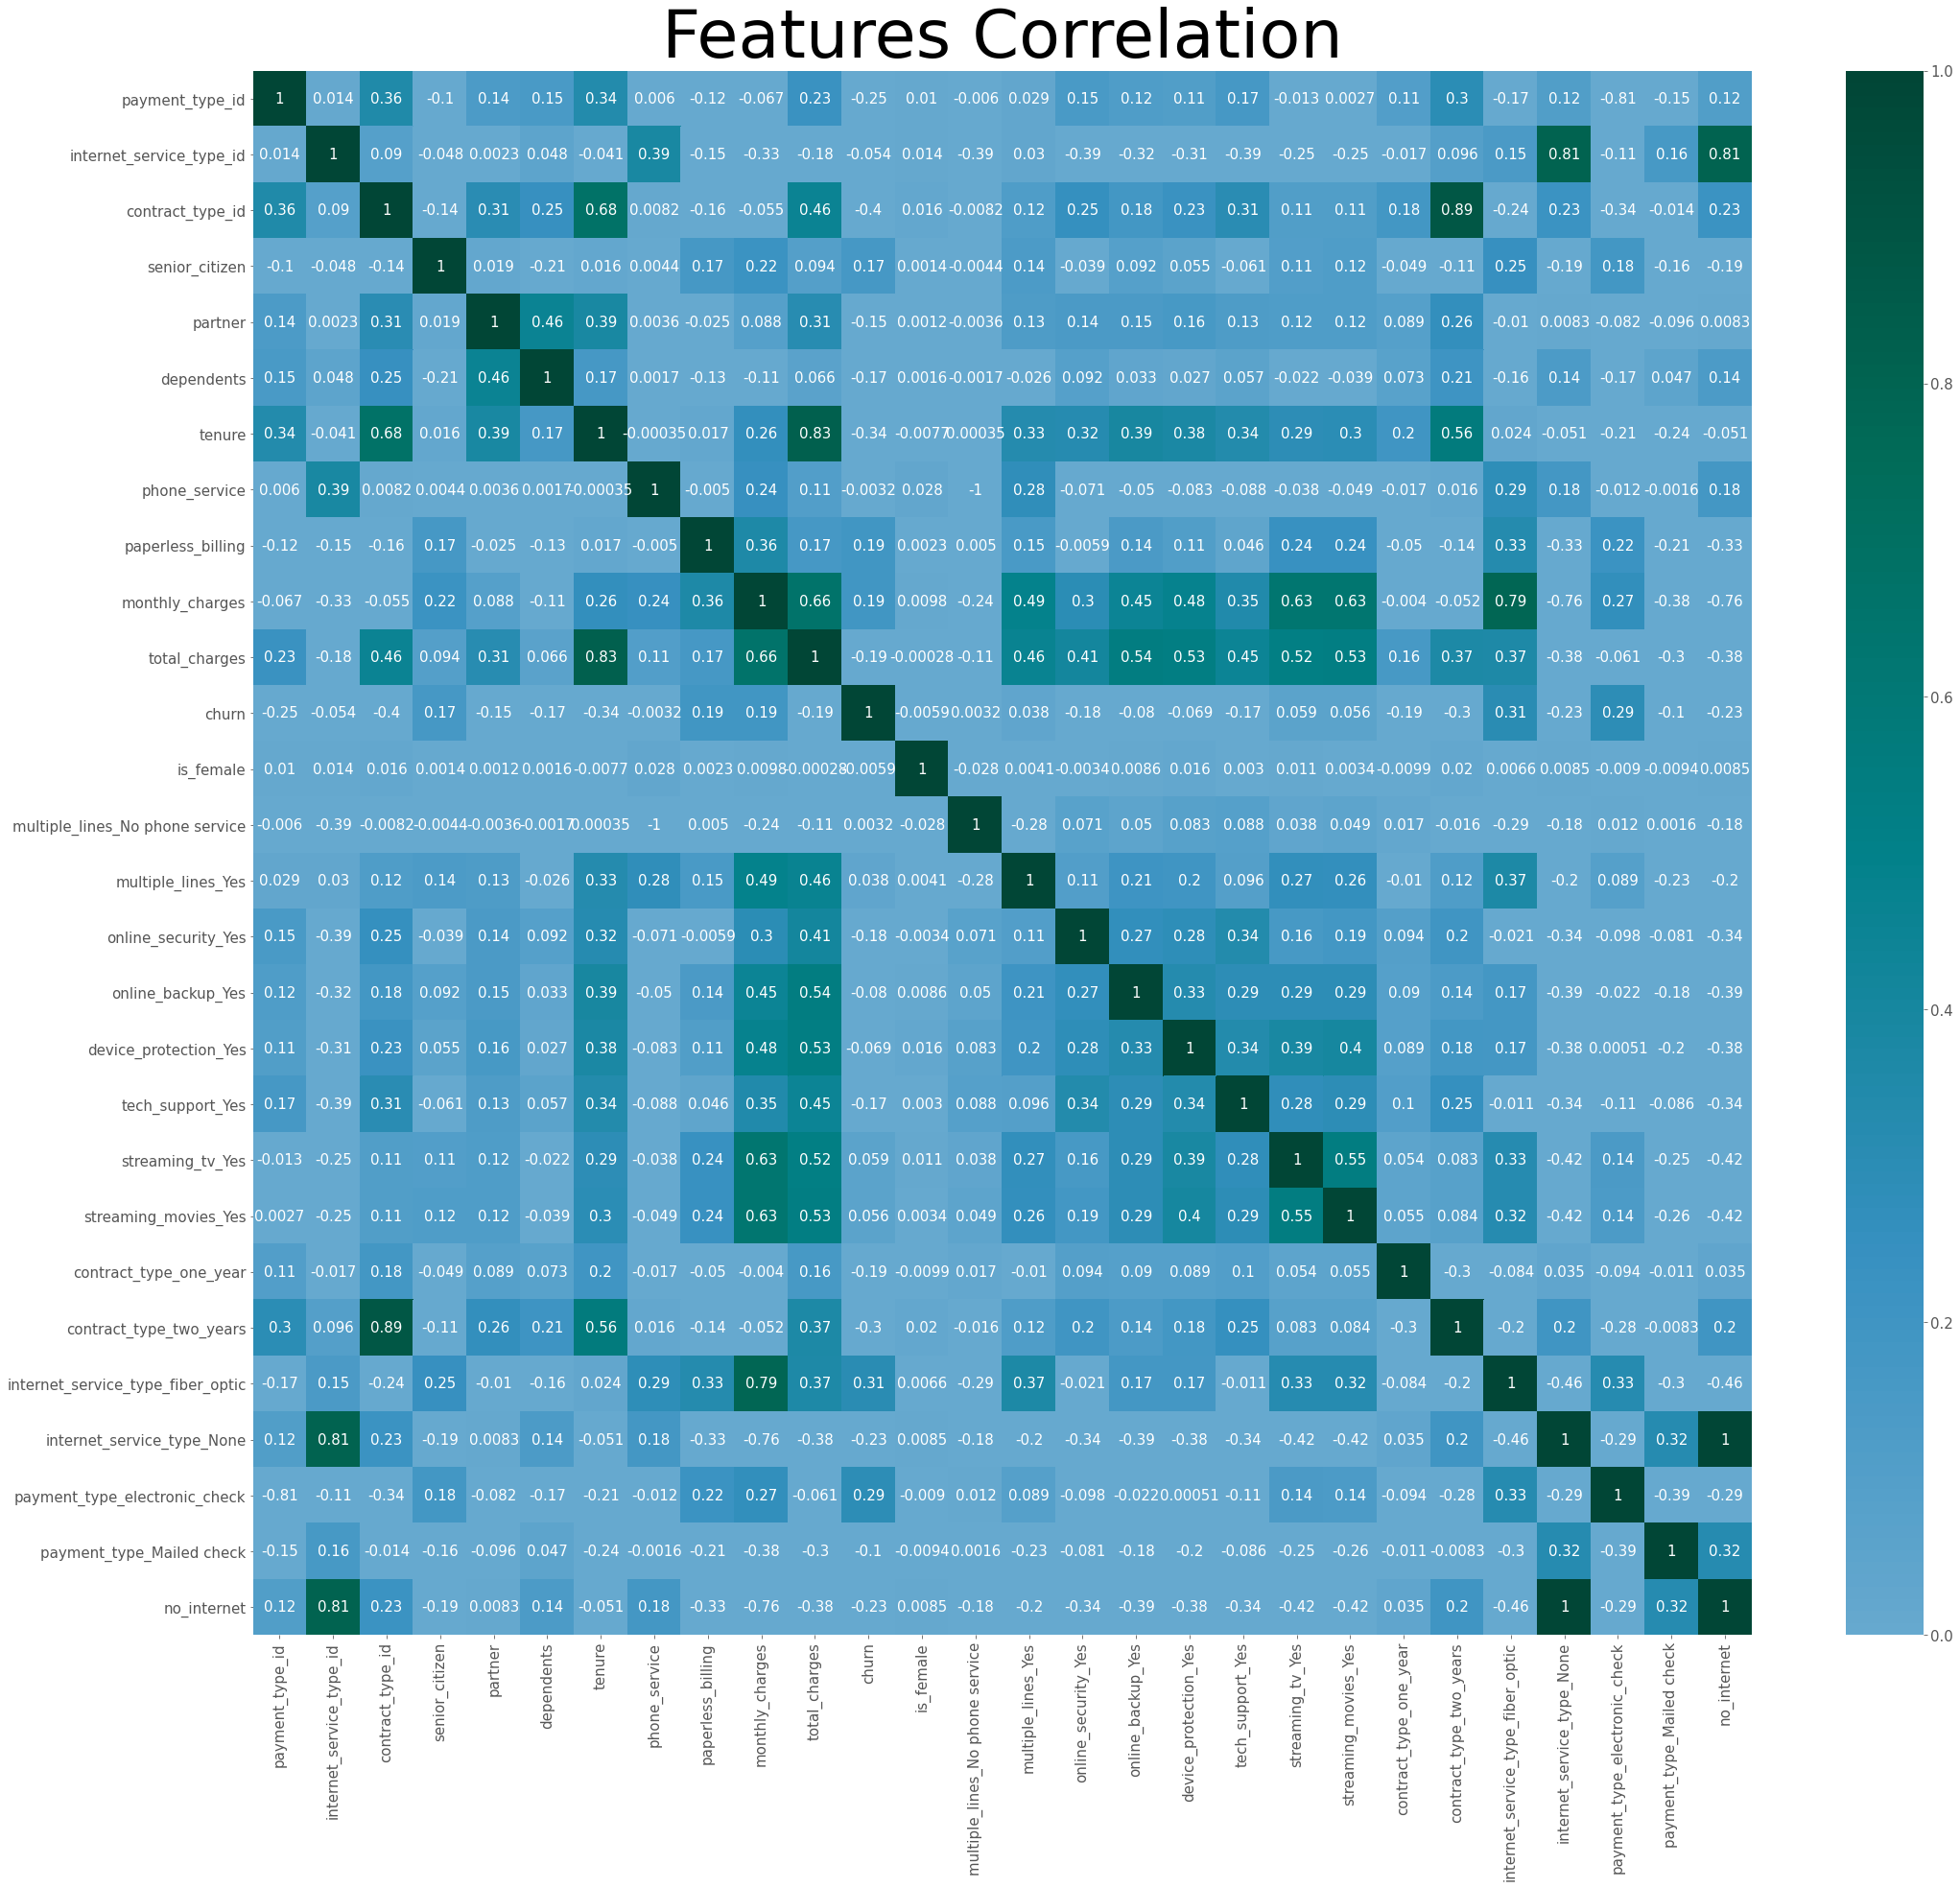

In [13]:
# chrats heat map  showing correlation 
plt.rc('figure', figsize=(35, 30))
plt.rc('font', size=15)
sns.heatmap(train.corr(), cmap="PuBuGn",\
            annot=True,\
            center=0,
            vmin=0, vmax=1) # allows for better visual identification of correlation 

plt.title('Features Correlation', size=70)
plt.show()

In [14]:
#  select features related to hipothesis
tenure_and_churn = train[['contract_type',\
                        'tenure',\
                        'churn',\
                        'internet_service_type',\
                        'online_backup_Yes',\
                        'device_protection_Yes',\
                        'online_security_Yes',\
                        'payment_type',\
                        'streaming_tv_Yes',\
                        'streaming_movies_Yes',\
                        'partner', \
                        'dependents'
                        ]]

tenure_and_churn.head(2)

,contract_type,tenure,churn,internet_service_type,online_backup_Yes,device_protection_Yes,online_security_Yes,payment_type,streaming_tv_Yes,streaming_movies_Yes,partner,dependents
6096,Two year,70,0,None,0,0,0,Bank transfer (automatic),0,0,1,0
1603,Month-to-month,15,0,DSL,1,1,0,Mailed check,0,1,1,1


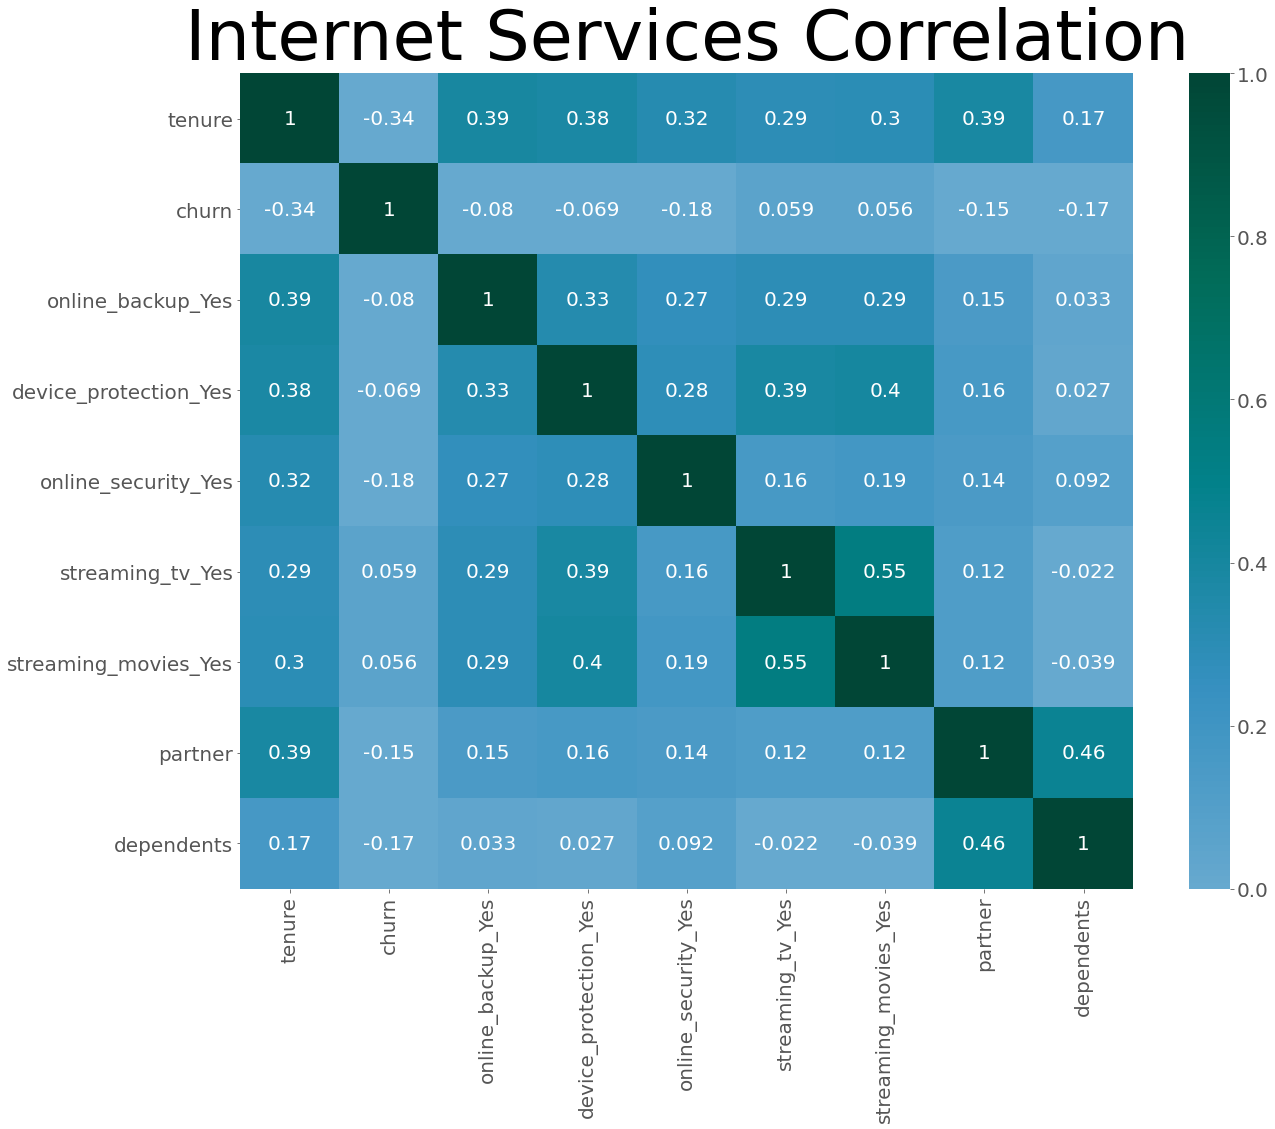

In [15]:
# chrats heat map  showing correlation 
plt.rc('figure', figsize=(20, 15))
plt.rc('font', size=20)
sns.heatmap(tenure_and_churn.corr(), cmap="PuBuGn",\
            annot=True,\
            center=0,
            vmin=0, vmax=1) # allows for better visual identification of correlation 

plt.title('Internet Services Correlation', size=70)
plt.show()

## Takeaway
- Security features might be better than any other feature it comes to churn
- Customer should have partner might be more loyal than sigle oness

###  Statistical test set up

In [16]:
# define alpha
alpha = .05

## Does the internet service affect churn?

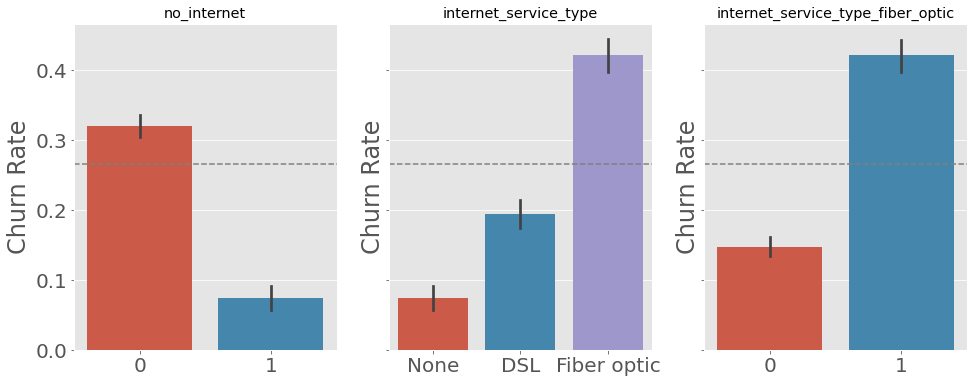

In [17]:
# churn rate by internet service

features = ['no_internet', 'internet_service_type', 'internet_service_type_fiber_optic']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    plt.rc('font', size=10)
    sns.barplot(feature, 'churn', data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

## Takeaway
- People who had Internet service churn at a rate of over three times the people who don't
- People who use fiber optic leave add a rate of two times of those use DSL.

## Hypothesis

$H_0$: Rate of churn is not dependent on customer Internet_service_type.

$H_1$: Rate of churn is dependent customer Internet_service_type.


## Do people that use streemers churn more than average

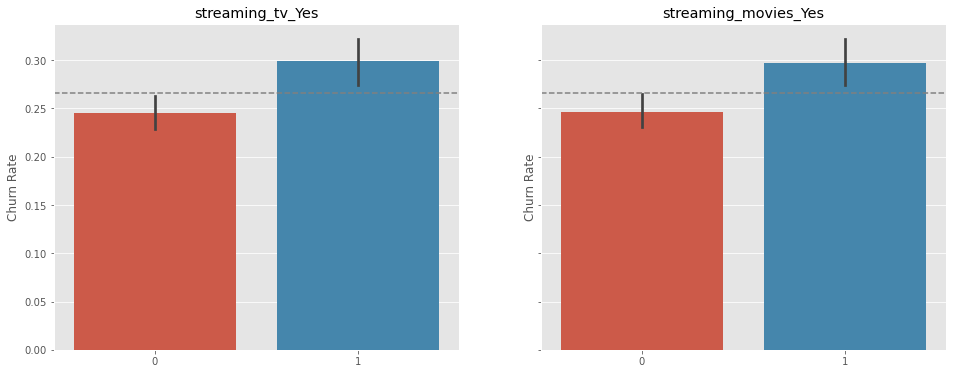

In [18]:
#streamers churn barplots

features = ['streaming_tv_Yes', 'streaming_movies_Yes']
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    
    sns.barplot(feature, 'churn', data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

## Takeaway
- Streaming services seem to increase churn 


## Hypothesis

$H_0$: Rate of churn is not dependent on customer streaming movies.

$H_1$: Rate of churn is dependent customer streaming movies.

## Does having online secqurity fetures decrease churn?  

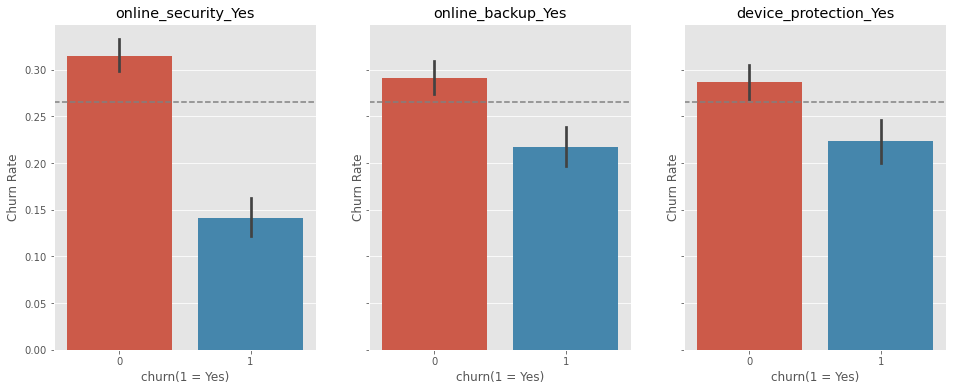

In [19]:
# Does having online secqurity fetures decrease churn 

features = ['online_security_Yes', 'online_backup_Yes', 'device_protection_Yes',]

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    plt.rc('font', size=10)
    sns.barplot(feature, 'churn', data=train, ax=ax[i])
    ax[i].set_xlabel('churn(1 = Yes)')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

## Takeway
- people who use security features stay longer the people that don't
- Online security seems to increase more than anything else


## Hypothesis

$H_0$: Rate of churn is not dependent on client having online_sequrity_Yes.

$H_1$: Rate of churn is dependent on client having online_sequrity_Yes.

## Do singles people stay longer? Does they way they relate to churn?

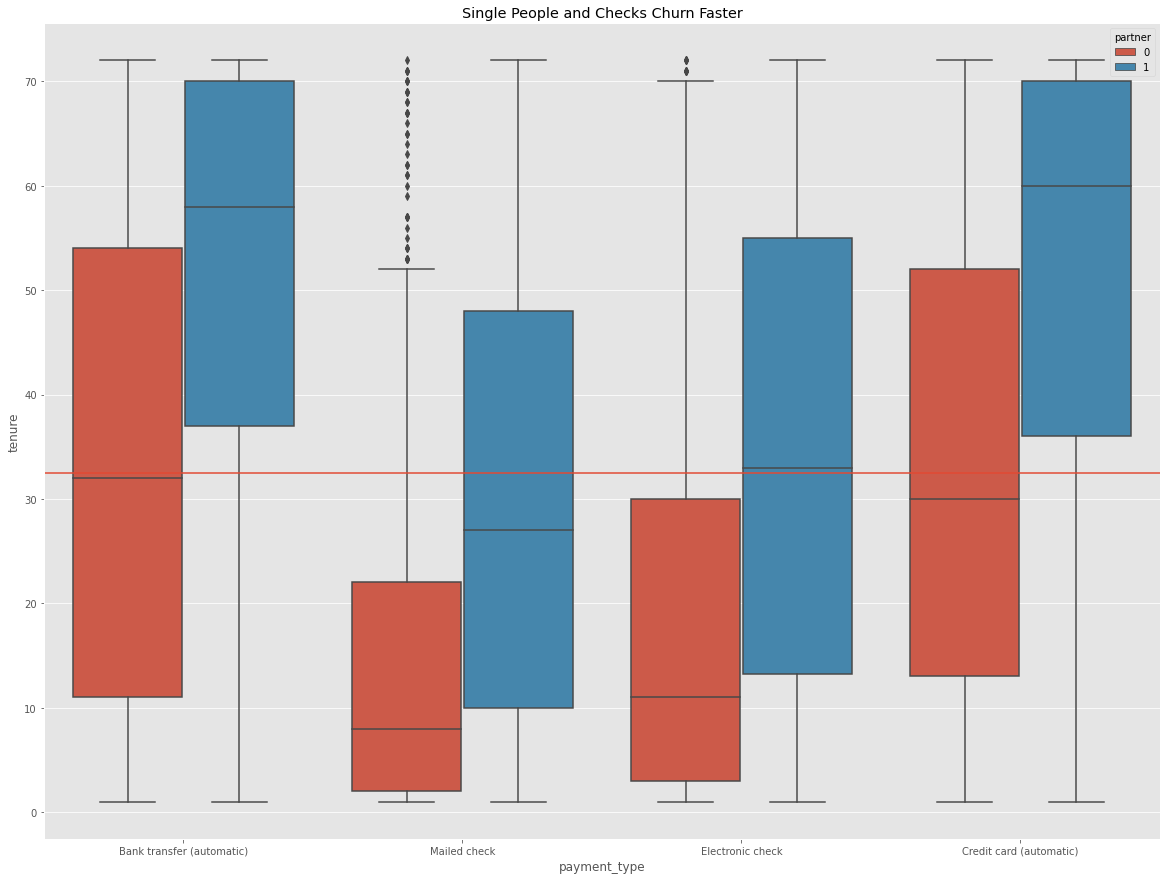

In [20]:
# Peple with parnters stay more than two times as ong as singles that use checks

plt.title("Single People and Checks Churn Faster")
sns.boxplot(x="payment_type", y="tenure", data=train, hue="partner",)
tenure_time_agerage = train.tenure.mean()
plt.axhline(tenure_time_agerage)
plt.show()


## Takeaway

- single pleople that use checks will no stay loinguer than year and a half. 
    - Try Incentivize customers to pay with bank transfer or credit card.

## Hypothesis

$H_0$: Tenure independent of bank transfer automatic payment

$H_1$: Tenure is independent of bank transfer automatic payment

In [21]:
# Satisttical Analysisi Features  

list(newdf.columns)

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'is_female']

In [22]:
# Se the alpha to 1
alpha = 0.05 

# Modeling

In [23]:
train_validate, telco_test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.churn)

telco_train, telco_validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.churn)

print(telco_train.shape)
print(telco_validate.shape)
print(telco_test.shape)

(3937, 38)
(1688, 38)
(1407, 38)


### Base Line

In [24]:
baseline_accuracy = (train.churn == 0).mean()
print(f"Baseline Accuracy is: {round(baseline_accuracy, 3)*100}%")

Baseline Accuracy is: 73.4%


#### Moedels used 
Logistic_Regression
DecisionTree
RandomForest

In [25]:
modeling = df.columns.values.tolist()
modeling = train.drop(columns=['multiple_lines_No phone service'])
modeling

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,contract_type_one_year,contract_type_two_years,internet_service_type_fiber_optic,internet_service_type_None,payment_type_electronic_check,payment_type_Mailed check,no_internet
6096,3,3,3,0,1,0,70,1,No,No internet service,...,0,0,0,0,1,0,1,0,0,1
1603,2,1,1,0,1,1,15,1,No,No,...,1,0,1,0,0,0,0,0,1,0
5350,1,2,1,1,1,0,52,1,Yes,Yes,...,0,1,1,0,0,1,0,1,0,0
2068,1,1,1,0,0,0,39,0,No phone service,No,...,1,0,1,0,0,0,0,1,0,0
6366,2,3,2,0,1,0,32,1,No,No internet service,...,0,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,3,1,3,0,1,1,71,1,Yes,Yes,...,1,1,1,0,1,0,0,0,0,0
4200,3,2,1,1,1,0,16,1,No,No,...,0,0,0,0,0,1,0,0,0,0
3012,1,2,2,0,1,0,40,1,No,No,...,0,0,0,1,0,1,0,1,0,0
763,3,1,2,0,0,0,11,1,No,No,...,1,0,0,1,0,0,0,0,0,0


In [26]:
# Set features variable to onsed hilghlighted above 
features = ['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'paperless_billing', 'monthly_charges', 'total_charges', 'is_female']
# features = features.remove('churn')
print(features)

['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'paperless_billing', 'monthly_charges', 'total_charges', 'is_female']


In [27]:
# Set X and Y
X_train = train[features]
X_validate = validate[features]
X_test = test[features]

y_train = train['churn']
y_validate = validate['churn']
y_test = test['churn']

In [28]:
# Set threshold = .05
threshold = threshold = .05

In [29]:
y_validate

611     0
1155    0
4916    0
2816    0
5301    0
       ..
953     0
2053    1
1992    0
2271    0
4179    1
Name: churn, Length: 1688, dtype: int64

In [30]:
f' Base line sttimation of churn; {df.churn.mode()}'


' Base line sttimation of churn; 0    0\ndtype: int64'

In [31]:
evaluations = pd.DataFrame({"actual": y_validate})
evaluations["baseline"] = 0
matrix = pd.crosstab(evaluations.actual, evaluations.baseline)
matrix

baseline,0
actual,
0,1239
1,449


## Decision Tree

In [32]:
# Make the model
clf = DecisionTreeClassifier(max_depth=5, random_state=123)

# Fit the model
clf = clf.fit(X_train, y_train)

# Train
y_pred = clf.predict(X_train)
train_accuracy = clf.score(X_train, y_train)

# Validate

y_pred = clf.predict(X_validate)
validate_accuracy = clf.score(X_validate, y_validate)


print('Accuracy of Decision Tree classifier on training set: {:.3f}'
      .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on validate set: {:.3f}'
      .format(clf.score(X_validate, y_validate)))
print(f"Passes Treshold Allocation: {threshold > round(abs(train_accuracy-validate_accuracy), 3)}")


Accuracy of Decision Tree classifier on training set: 0.793
Accuracy of Decision Tree classifier on validate set: 0.780
Passes Treshold Allocation: True


-------------


## Random forest 


In [33]:
# Make the model
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=5,
                            n_estimators=25,
                            max_depth=5, 
                            random_state=500)

# Fit the model
rf.fit(X_train, y_train)

# Train
y_pred = rf.predict(X_train)
train_accuracy = rf.score(X_train, y_train)

# Validate
y_pred = rf.predict(X_validate)
validate_accuracy = rf.score(X_validate, y_validate)

print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of random forest classifier on validate set: {:.3f}'
      .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on training set: 0.80
Accuracy of random forest classifier on validate set: 0.792


In [36]:
print(confusion_matrix(y_validate, y_pred))
print(classification_report(y_validate, y_pred))

[[1144   95]
 [ 256  193]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1239
           1       0.67      0.43      0.52       449

    accuracy                           0.79      1688
   macro avg       0.74      0.68      0.70      1688
weighted avg       0.78      0.79      0.78      1688



------------


## K Neighbors

In [37]:
# Make the model
knn = KNeighborsClassifier(n_neighbors=11, weights='uniform')

# Fit the model
knn.fit(X_train, y_train)

# Train
y_pred = knn.predict(X_train)
train_accuracy = knn.score(X_train, y_train)

# Validate
y_pred = knn.predict(X_validate)
validate_accuracy = knn.score(X_validate, y_validate)

print('Accuracy of K Neighbors classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K Neighbors classifier on validate set: {:.3f}'
      .format(knn.score(X_validate, y_validate)))
print(f"Passes Treshold Allocation: {threshold > round(abs(train_accuracy-validate_accuracy), 3)}")


Accuracy of K Neighbors classifier on training set: 0.81
Accuracy of K Neighbors classifier on validate set: 0.781
Passes Treshold Allocation: True


In [38]:
len(y_test)

1407

In [39]:
print(confusion_matrix(y_validate, y_pred))
print(classification_report(y_validate, y_pred))

[[1133  106]
 [ 263  186]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1239
           1       0.64      0.41      0.50       449

    accuracy                           0.78      1688
   macro avg       0.72      0.66      0.68      1688
weighted avg       0.77      0.78      0.76      1688



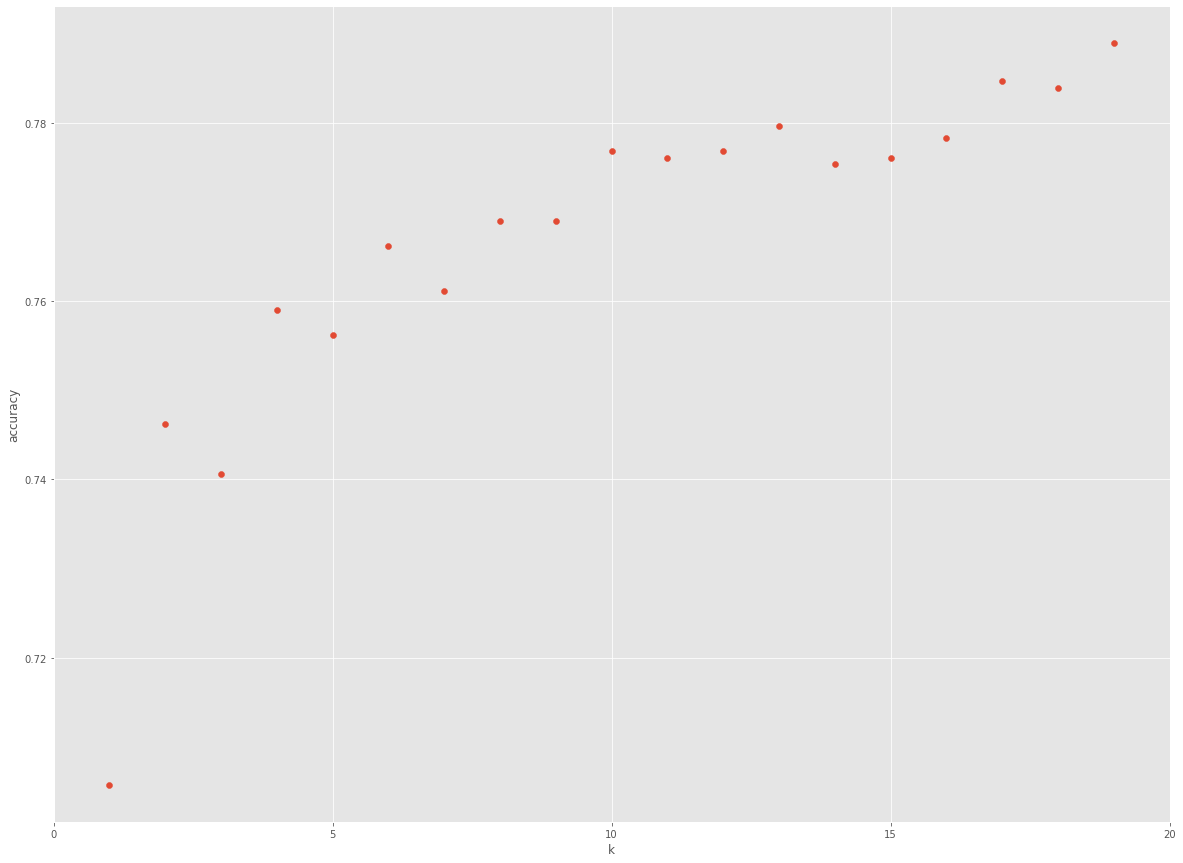

In [40]:
# visualize model
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

-------------------

## Logistic Regresion

In [41]:
# Make the model
logit = LogisticRegression(C=.15, random_state=123)

# Fit the Model
logit.fit(X_train, y_train)

# Train
y_pred = logit.predict(X_train)
train_accuracy = logit.score(X_train, y_train)

# Validate
y_pred = logit.predict(X_validate)
validate_accuracy = logit.score(X_validate, y_validate)

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))
print('Accuracy of Logistic Regression classifier on validate set: {:.3f}'
      .format(logit.score(X_validate, y_validate)))
print(f"Passes Treshold Allocation: {threshold > round(abs(train_accuracy-validate_accuracy), 3)}")

Accuracy of Logistic Regression classifier on training set: 0.79
Accuracy of Logistic Regression classifier on validate set: 0.792
Passes Treshold Allocation: True


In [42]:
print(confusion_matrix(y_validate, y_pred))
print(classification_report(y_validate, y_pred))

[[1099  140]
 [ 211  238]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1239
           1       0.63      0.53      0.58       449

    accuracy                           0.79      1688
   macro avg       0.73      0.71      0.72      1688
weighted avg       0.78      0.79      0.79      1688



In [40]:
# Make the model
knn = KNeighborsClassifier(n_neighbors=11, weights='uniform')

# Fit the model
knn.fit(X_train, y_train)

# Train
y_pred = knn.predict(X_train)
train_accuracy = knn.score(X_train, y_train)

# Validate
y_pred = knn.predict(X_validate)
validate_accuracy = knn.score(X_validate, y_validate)


print('Accuracy of Random Forest classifier on training set: {:.3f}'
      .format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on validate set: {:.3f}'
      .format(rf.score(X_validate, y_validate)))
print('Accuracy of Random Forest classifier on test set: {:.3f}'
      .format(rf.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 0.800
Accuracy of Random Forest classifier on validate set: 0.794
Accuracy of Random Forest classifier on test set: 0.805


### Takeaway 

- Model may have some issues 
- K neighbor model seem to do well
    Accuracy of K Neighbors classifier on training set: 0.82
    Accuracy of K Neighbors classifier on validate set: 0.799

Feature Importance

In [59]:

rf.feature_importances_

array([0.10505376, 0.143886  , 0.22834444, 0.02478273, 0.00876561,
       0.00709805, 0.2430472 , 0.00287203, 0.02625577, 0.08974329,
       0.11822784, 0.00192329])

In [60]:
proba_test = rf.predict_proba(X_test)
proba_df = pd.DataFrame(proba_test, columns=rf.classes_.tolist())
reset_test = test.reset_index()
test_proba_df = pd.concat([reset_test, proba_df], axis=1)
test_proba_df = test_proba_df.rename(columns={0: 'not_churn', 1:'churn_yes'})
test_proba_df['predicted'] = np.where(test_proba_df.not_churn > test_proba_df.churn_yes, 'not_churn', 'churn')
csv_df = test_proba_df[['index', 'not_churn', 'churn_yes', 'predicted']]
csv_df.not_churn = csv_df.not_churn.round(2)
csv_df.churn_yes = csv_df.churn_yes.round(2)
csv_df.sample(5)

,index,not_churn,churn_yes,predicted
722,2643,0.90,0.10,not_churn
1094,2184,0.70,0.30,not_churn
239,2716,0.76,0.24,not_churn
1251,5839,0.98,0.02,not_churn
474,4066,0.65,0.35,not_churn


In [61]:
csv_df.sample(10)

,index,not_churn,churn_yes,predicted
1197,825,0.91,0.09,not_churn
426,3567,0.67,0.33,not_churn
487,4522,0.54,0.46,not_churn
538,2287,0.31,0.69,churn
817,697,0.82,0.18,not_churn
1040,4172,0.43,0.57,churn
384,4347,0.48,0.52,churn
782,4999,0.21,0.79,churn
290,4127,0.74,0.26,not_churn
316,6262,0.98,0.02,not_churn


In [50]:
# Create cvs file
csv_df.to_csv('telco_predictions.csv')